In [ ]:
from google.colab import files
upload=files.upload()

Saving drug200.csv to drug200.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [ ]:
dataset1 = pd.read_csv('drug200.csv')
dataset1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df = pd.DataFrame(dataset1)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.drop(['Sex'], axis=1, inplace=True)
df

,BP,Cholesterol,Na_to_K,Drug
0,HIGH,HIGH,25.355,DrugY
1,LOW,HIGH,13.093,drugC
2,LOW,HIGH,10.114,drugC
3,NORMAL,HIGH,7.798,drugX
4,LOW,HIGH,18.043,DrugY
...,...,...,...,...
195,LOW,HIGH,11.567,drugC
196,LOW,HIGH,12.006,drugC
197,NORMAL,HIGH,9.894,drugX
198,NORMAL,NORMAL,14.020,drugX


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['BP']= label_encoder.fit_transform(df['BP'])

df['BP'].unique()

array([0, 1, 2])

In [ ]:
df['Cholesterol']= label_encoder.fit_transform(df['Cholesterol'])

df['Cholesterol'].unique()

array([0, 1])

In [ ]:
df['Drug']= label_encoder.fit_transform(df['Drug'])

df['Drug'].unique()

array([0, 3, 4, 1, 2])

In [ ]:
dataset1 = pd.get_dummies(df)
dataset1

,BP,Cholesterol,Na_to_K,Drug
0,0,0,25.355,0
1,1,0,13.093,3
2,1,0,10.114,3
3,2,0,7.798,4
4,1,0,18.043,0
...,...,...,...,...
195,1,0,11.567,3
196,1,0,12.006,3
197,2,0,9.894,4
198,2,1,14.020,4


In [ ]:
def min_max_normallize(dataset1):
    min_val = np.min(dataset1, axis=0)
    max_val = np.max(dataset1, axis=0)
    normal = (dataset1 - min_val) / (max_val - min_val)
    return normal

In [ ]:
dataset1 = min_max_normallize(dataset1)
dataset1

,BP,Cholesterol,Na_to_K,Drug
0,0.0,0.0,0.596848,0.00
1,0.5,0.0,0.213397,0.75
2,0.5,0.0,0.120239,0.75
3,1.0,0.0,0.047814,1.00
4,0.5,0.0,0.368191,0.00
...,...,...,...,...
195,0.5,0.0,0.165676,0.75
196,0.5,0.0,0.179405,0.75
197,1.0,0.0,0.113359,1.00
198,1.0,1.0,0.242385,1.00


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

array([[<Axes: xlabel='BP', ylabel='BP'>,
        <Axes: xlabel='Cholesterol', ylabel='BP'>,
        <Axes: xlabel='Na_to_K', ylabel='BP'>,
        <Axes: xlabel='Drug', ylabel='BP'>],
       [<Axes: xlabel='BP', ylabel='Cholesterol'>,
        <Axes: xlabel='Cholesterol', ylabel='Cholesterol'>,
        <Axes: xlabel='Na_to_K', ylabel='Cholesterol'>,
        <Axes: xlabel='Drug', ylabel='Cholesterol'>],
       [<Axes: xlabel='BP', ylabel='Na_to_K'>,
        <Axes: xlabel='Cholesterol', ylabel='Na_to_K'>,
        <Axes: xlabel='Na_to_K', ylabel='Na_to_K'>,
        <Axes: xlabel='Drug', ylabel='Na_to_K'>],
       [<Axes: xlabel='BP', ylabel='Drug'>,
        <Axes: xlabel='Cholesterol', ylabel='Drug'>,
        <Axes: xlabel='Na_to_K', ylabel='Drug'>,
        <Axes: xlabel='Drug', ylabel='Drug'>]], dtype=object)

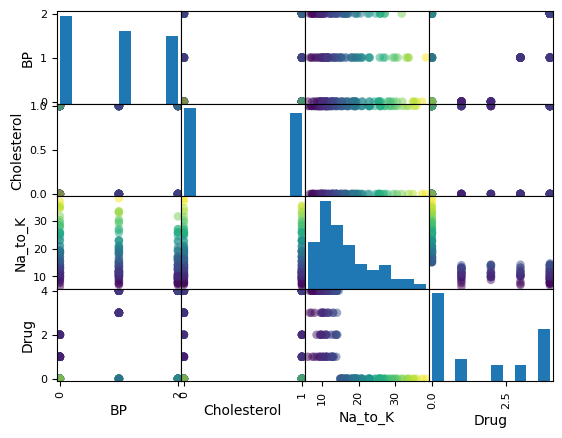

In [ ]:
pd.plotting.scatter_matrix(df, c=df.Na_to_K, s=150)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Knn = KNeighborsClassifier(n_neighbors=11, metric='manhattan', p=2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.iloc[:, :12]
y = df.iloc[:, 0]
x

,BP,Cholesterol,Na_to_K,Drug
0,0,0,25.355,0
1,1,0,13.093,3
2,1,0,10.114,3
3,2,0,7.798,4
4,1,0,18.043,0
...,...,...,...,...
195,1,0,11.567,3
196,1,0,12.006,3
197,2,0,9.894,4
198,2,1,14.020,4


In [ ]:
df.drop(['BP', 'Cholesterol', 'Drug'], axis=1, inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
Knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [ ]:
Knn.score(x_test, y_test)

0.9

In [ ]:
neighbors = np.arange(1, 12)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

In [ ]:
for i, k in enumerate(neighbors):
    Knn_model = KNeighborsClassifier(n_neighbors=k)
    Knn_model.fit(x_train, y_train)
    train_acc[i] = Knn_model.score(x_train, y_train)
    test_acc[i] = Knn_model.score(x_test, y_test)

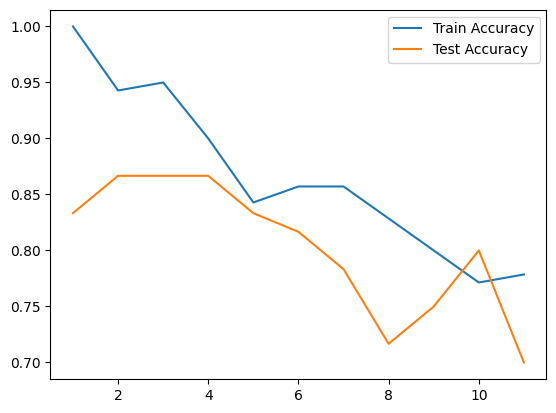

In [ ]:
plt.plot(neighbors, train_acc, label='Train Accuracy')
plt.plot(neighbors, test_acc, label='Test Accuracy')
plt.legend()
plt.show()